In [2]:
# Import packages

# File structure
import os
import pathlib

# Vector data
import geopandas as gpd
import pandas as pd

# Raster data
import rioxarray as rxr
import xarray as xr

# Arrays
import numpy as np

# Maps and plots
import holoviews as hv
import hvplot.pandas
import hvplot.xarray

# Open street map
from osmnx import features as osm
import osmnx as ox

# Earthpy
import earthpy
import earthpy.api.appeears as eaapp

# Plotting
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression

In [3]:
# Important: If you haven't already, you need to install pygbif using the command below
# Run this command in the terminal to install: pip install pygbif

# Import packages
import os # For file paths, data management, interacting with the operating system
import pathlib # Object oriented file path management
import time # Time how long operations take in Python
import zipfile # Deal with zip files
from getpass import getpass # Security login for downloading GBIF data
from glob import glob # Search for specific file extensions

# Libraries for data analysis 
import pandas as pd # Data analysis for tabular data
import geopandas as gpd # Data analysis for geospatial data
import pygbif.occurrences as occ # Get occurrence data
import pygbif.species as species # Get species data
import requests # Download data

# Libraries for Dynamic mapping
import cartopy.crs as ccrs #Coordinate reference systems 
import panel as pn #customize the dynamic map
import hvplot.pandas #make the holoview plot with geo-dataframe
import calendar # Change month numbers to month names

In [4]:
# Set up a project and folder for data using earthpy
project = earthpy.Project("Final Project", dirname = 'final_project')

In [5]:
# Ecoregions data from GeographyRealm, RESOLVE, and OneEarth: 
# GeographyRealm: https://www.geographyrealm.com/terrestrial-ecoregions-gis-data/
# OneEarth: https://www.oneearth.org/announcing-the-release-of-ecoregion-snapshots/
eco_url = (
    "https://storage.googleapis.com/teow2016/Ecoregions2017.zip")

# Set up a path to save the data to your machine
eco_dir = "data/ecoregions"
os.makedirs(eco_dir, exist_ok=True)
# Make ecoregions directory
os.makedirs(eco_dir, exist_ok=True)

# Join ecoregions shapefile path
eco_path = os.path.join(eco_dir, 'ecoregions.shp')

# Only download once
if not os.path.exists(eco_path):
    my_gdf = gpd.read_file(eco_url)
    my_gdf.to_file(eco_path)

In [6]:
# Opening the download and renaming some of the column names
eco_gdf = (
    gpd.read_file(eco_path)
    [['OBJECTID','ECO_NAME','SHAPE_AREA','geometry']]
    .rename(columns={
        'OBJECTID': 'ecoregion_id',
        'ECO_NAME': 'name',
        'SHAPE_AREA': 'area'
    })
    .set_index('ecoregion_id')
)

# Plot the ecoregions quickly to check download
eco_gdf.plot()
eco_gdf.head()

: 

In [7]:
selected = eco_gdf[(eco_gdf["name"] == "Northwest Territories taiga") |
                   (eco_gdf["name"] == "Muskwa-Slave Lake taiga")]

In [8]:
selected = eco_gdf[(eco_gdf["name"] == "Western shortgrass prairie") |
                   (eco_gdf["name"] == "Central-Southern US mixed grasslands")]

<Axes: >

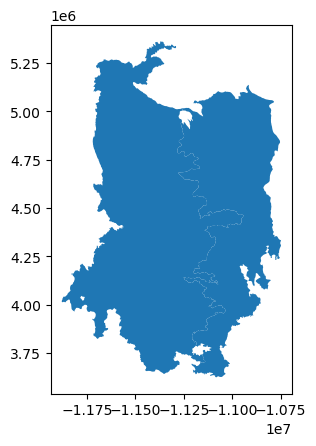

In [9]:
selected_merc = selected.to_crs("EPSG:3395")  # or ccrs.Mercator()
selected_merc.plot()

In [1]:
# Search for RMNP using OpenStreetMaps
alberta_gdf = ox.geocode_to_gdf(
    'Alberta')

# Check it out
alberta_gdf

NameError: name 'ox' is not defined

In [10]:
# Initialize AppeearsDownloader for MODIS NDVI data
# Set parameters
ndvi_downloader = eaapp.AppeearsDownloader(

    # Give the download a name
    download_key = "ecoregion_ndvi",

    # Tell it to put the data in the project directory already defined
    project = project,

    # Specify the MODIS product
    product = 'MOD13Q1.061',
    layer = '_250m_16_days_NDVI',

    # Set a start date and end data
    start_date = "06-01",
    end_date = "06-30",

    # Recurring meaning we want to download those dates over multiple years
    recurring = True,

    # Specify the range of years of interest
    year_range = [2004, 2024],

    # Specify the polygon we want to get NDVI data for
    polygon = selected_merc
)

In [ ]:
# Download the prepared download
ndvi_downloader.download_files(cache=False)

INFO:Submitting task request...


No stored credentials found for urs.earthdata.nasa.gov. Please log in.


/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:192: UserWarning: Setting credentials not supported for 'netrc' backend.
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/earthpy/api/auth.py:196: UserWarning: Failed to store credentials with 'keyring': No recommended backend was available. Install a recommended 3rd party backend package; or, install the keyrings.alt package if you want to use the non-recommended backends. See https://pypi.org/project/keyring for details.
  warnings.warn(


Credentials stored using 'env' backend.


INFO:Login successful. Auth Header: Bearer gf6dJeGgwteePX3wtablvSAsa3HbUGd7IMbFlOrjRX7GyMuXACLNR45IaRZIP4laMUcjeRtSL1mHyHdYCbuZ4Q


HTTPError: 500 Server Error: INTERNAL SERVER ERROR for url: https://appeears.earthdatacloud.nasa.gov/api/task

: 